# Elijah Campbell-Ihim Machine Learning Sleep Analysis
## Description: For this project, I recorded data on my own sleep patterns and habits over about a month long period. This included the time I went to bed, the time I fell asleep, the time my alarm went off, the number of times I hit snooze, the time I got out of bed, and my subjective rating of my sleep (both sleep quality and overall rating of the experience). 
## Goal: Figure out which aspects of my sleep routine contribute most to my subjective sleep experience
## Outline: 
### Step 1: Import Libraries and Organize the Data (Data Preprocessing)
### Step 2: Visualize the Data (Data Visualization)
### Step 3: Apply Machine Learning (Data Modeling & Deployment)
### Steps 4 and 5: Use Results to Draw Conclusions

# --- Start of Code ---

## Step 1: Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sleepDF = pd.read_csv("sleepData.csv")
sleepDF = sleepDF.drop(sleepDF.columns[0], axis = 1)
sleepDF.head()

,In Bed,Sleep Start,Sleep End,Num of Snoozes,Out of Bed,Sleep Time (min),Bed Time (min),Sleep Quality (1-10),Bed for too long? (1/0),Rating (1-10)
0,1:20,1:50,8:30,5,9:20,400,480,7,1,5
1,1:05,1:40,8:45,5,9:20,425,495,6,1,4
2,0:05,0:45,8:45,4,9:18,480,553,7,1,6
3,2:40,2:50,10:30,4,11:10,460,510,5,1,5
4,1:30,1:45,9:00,3,9:30,435,480,7,0,7


### We need to convert the times from XX:XX format to a float value that the model can interpret <br> <br> We have 4 Time Columns: In Bed, Sleep Start, Sleep End, Out of Bed

In [3]:
# Convert the time column to datetime format
numTime = pd.to_datetime(sleepDF['In Bed'])

# Extract total minutes from the time column and create a new column
sleepDF['In Bed (Numerical)'] = numTime.dt.hour * 60 + numTime.dt.minute

# Use Robust Scaler to keep values in similar range 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

#Set the col values to their scaled values
sleepDF['In Bed (Numerical)'] = scaler.fit_transform(sleepDF[['In Bed (Numerical)']])

#*******************Sleep Start**************************

numTime = pd.to_datetime(sleepDF['Sleep Start'])

sleepDF['Sleep Start (Numerical)'] = numTime.dt.hour * 60 + numTime.dt.minute


sleepDF['Sleep Start (Numerical)'] = scaler.fit_transform(sleepDF[['Sleep Start (Numerical)']])


#*******************Sleep End**************************

numTime = pd.to_datetime(sleepDF['Sleep End'])

sleepDF['Sleep End (Numerical)'] = numTime.dt.hour * 60 + numTime.dt.minute


sleepDF['Sleep End (Numerical)'] = scaler.fit_transform(sleepDF[['Sleep End (Numerical)']])

#********************Out of Bed*************************

numTime = pd.to_datetime(sleepDF['Out of Bed'])

sleepDF['Out of Bed (Numerical)'] = numTime.dt.hour * 60 + numTime.dt.minute


sleepDF['Out of Bed (Numerical)'] = scaler.fit_transform(sleepDF[['Out of Bed (Numerical)']])

#****************Show new Values*****************************
sleepDF.head()

,In Bed,Sleep Start,Sleep End,Num of Snoozes,Out of Bed,Sleep Time (min),Bed Time (min),Sleep Quality (1-10),Bed for too long? (1/0),Rating (1-10),In Bed (Numerical),Sleep Start (Numerical),Sleep End (Numerical),Out of Bed (Numerical)
0,1:20,1:50,8:30,5,9:20,400,480,7,1,5,0.068966,0.262295,-0.5,-0.139535
1,1:05,1:40,8:45,5,9:20,425,495,6,1,4,-0.068966,0.131148,0.0,-0.139535
2,0:05,0:45,8:45,4,9:18,480,553,7,1,6,-0.620690,-0.590164,0.0,-0.176744
3,2:40,2:50,10:30,4,11:10,460,510,5,1,5,0.804598,1.049180,3.5,1.906977
4,1:30,1:45,9:00,3,9:30,435,480,7,0,7,0.160920,0.196721,0.5,0.046512


## Before we use any Machine Learning, we can make some plots to visualize the data.
#### This heatmap shows the general distribution of time I spent in bed vs time I spent sleeping. 

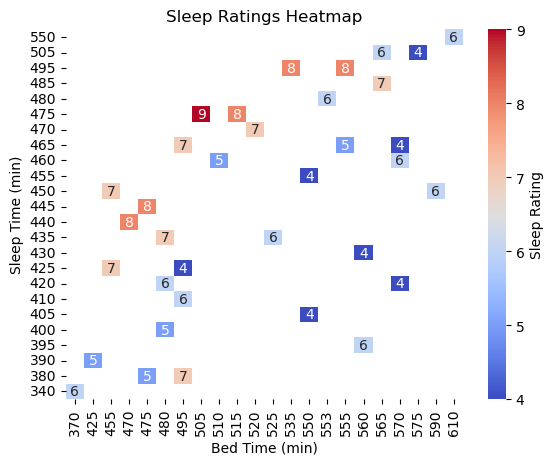

In [4]:
heatmap_data = sleepDF.pivot_table(index='Sleep Time (min)', columns='Bed Time (min)', values='Rating (1-10)', aggfunc='mean')

heatmap_data = heatmap_data[::-1]

# Plot heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, cbar_kws={'label': 'Sleep Rating'})


plt.title('Sleep Ratings Heatmap')
plt.show()

#### It seems like the general trend is less time in bed, and more time actually sleeping for the highest sleep rating

#### Next, this heatmap shows the general distribution of the times I get in and out of bed.

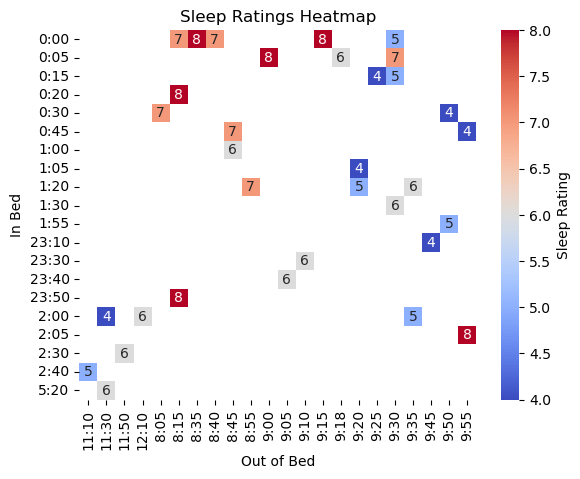

In [5]:
heatmap_data = sleepDF.pivot_table(index='In Bed', columns='Out of Bed', values='Rating (1-10)', aggfunc='mean')

# Plot heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, cbar_kws={'label': 'Sleep Rating'})
plt.title('Sleep Ratings Heatmap')
plt.show()


#### It seems like the ideal range of time to go to sleep is around 12:00 - 12:45 and the ideal range to get out of bed is around 8:15 - 9:15. 

### Now to continue with our Machine Learning, lets scale all our columns to the same scale

In [6]:
#Scale all other numeric columns
sleepDF['Num of Snoozes'] = scaler.fit_transform(sleepDF[['Num of Snoozes']])
sleepDF['Sleep Time (min)'] = scaler.fit_transform(sleepDF[['Sleep Time (min)']])
sleepDF['Bed Time (min)'] = scaler.fit_transform(sleepDF[['Bed Time (min)']])
sleepDF['Sleep Quality (1-10)'] = scaler.fit_transform(sleepDF[['Sleep Quality (1-10)']])
sleepDF['Rating (1-10)'] = scaler.fit_transform(sleepDF[['Rating (1-10)']])
sleepDF.head()

,In Bed,Sleep Start,Sleep End,Num of Snoozes,Out of Bed,Sleep Time (min),Bed Time (min),Sleep Quality (1-10),Bed for too long? (1/0),Rating (1-10),In Bed (Numerical),Sleep Start (Numerical),Sleep End (Numerical),Out of Bed (Numerical)
0,1:20,1:50,8:30,0.50,9:20,-0.926829,-0.46875,1.0,1,-0.5,0.068966,0.262295,-0.5,-0.139535
1,1:05,1:40,8:45,0.50,9:20,-0.439024,-0.28125,0.0,1,-1.0,-0.068966,0.131148,0.0,-0.139535
2,0:05,0:45,8:45,0.25,9:18,0.634146,0.44375,1.0,1,0.0,-0.620690,-0.590164,0.0,-0.176744
3,2:40,2:50,10:30,0.25,11:10,0.243902,-0.09375,-1.0,1,-0.5,0.804598,1.049180,3.5,1.906977
4,1:30,1:45,9:00,0.00,9:30,-0.243902,-0.46875,1.0,0,0.5,0.160920,0.196721,0.5,0.046512


## Step 2: Now that we have the data preprocessed, lets use a Random Forest Regressor to find the most significant features

In [7]:
#This function takes a feature set and a target set, and outputs a plot of the feature importances
def showFeatureImp(X, y):
    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor()
    model.fit(X, y)

    # Get feature importances
    feature_importances = model.feature_importances_

    # Get names of features
    features = list(X.columns)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y=list(features), x=list(feature_importances), orient='h', palette="viridis")
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importances for chosen Sleep Metric (y)')
    plt.show()

### Feature Importance plot for Overall Sleep Rating

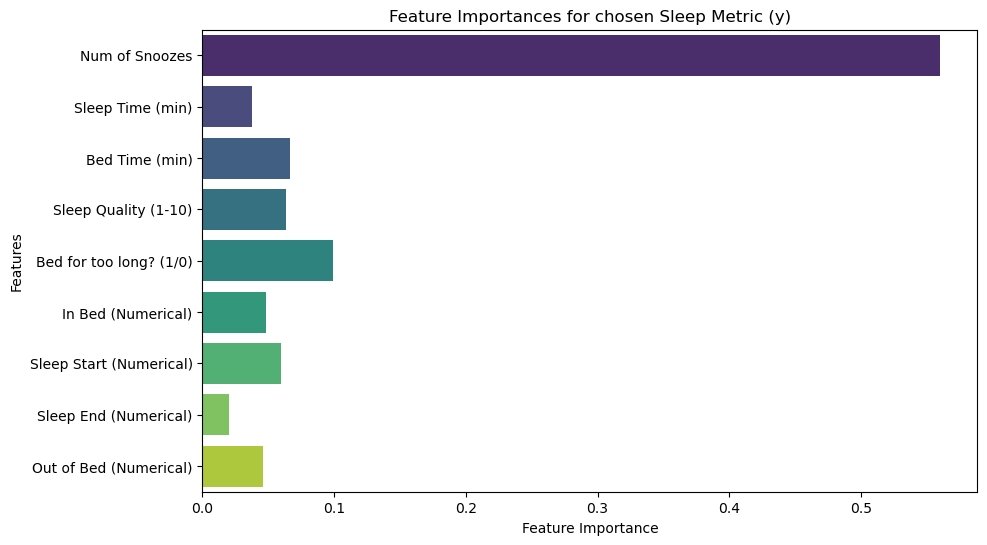

In [8]:
#This sets the Sleep Metric as overall sleep rating
X = sleepDF.drop(["Rating (1-10)", "In Bed", "Sleep Start", "Sleep End", "Out of Bed"], axis = 1)
y = sleepDF["Rating (1-10)"]
showFeatureImp(X, y)

### Feature Importance plot for Sleep Quality

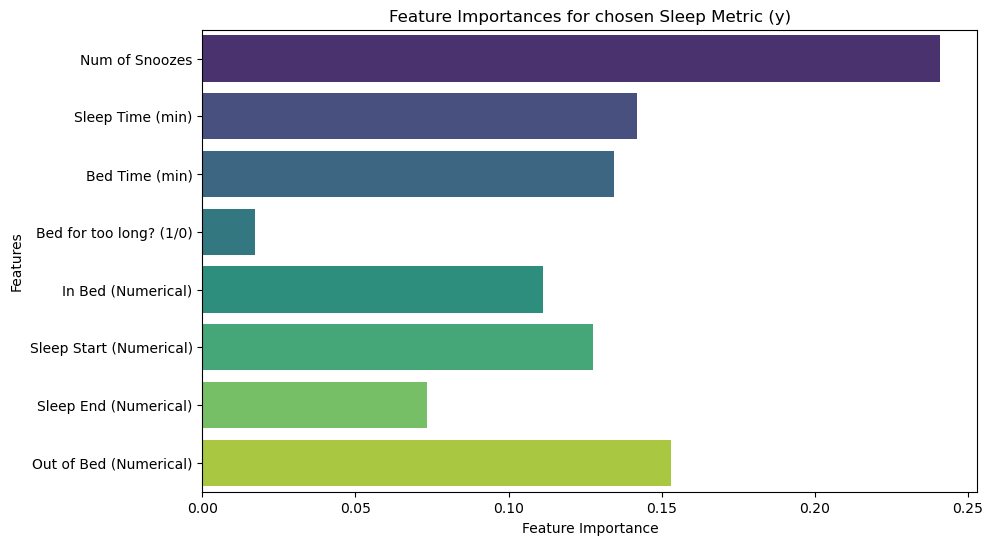

In [9]:
#This sets the Sleep Metric as Sleep Quality
X = sleepDF.drop(["Sleep Quality (1-10)", "Rating (1-10)", "In Bed", "Sleep Start", "Sleep End", "Out of Bed"], axis = 1)
y = sleepDF["Sleep Quality (1-10)"]
showFeatureImp(X, y)

### Feature Importance plot for binary variable "In bed for too long"

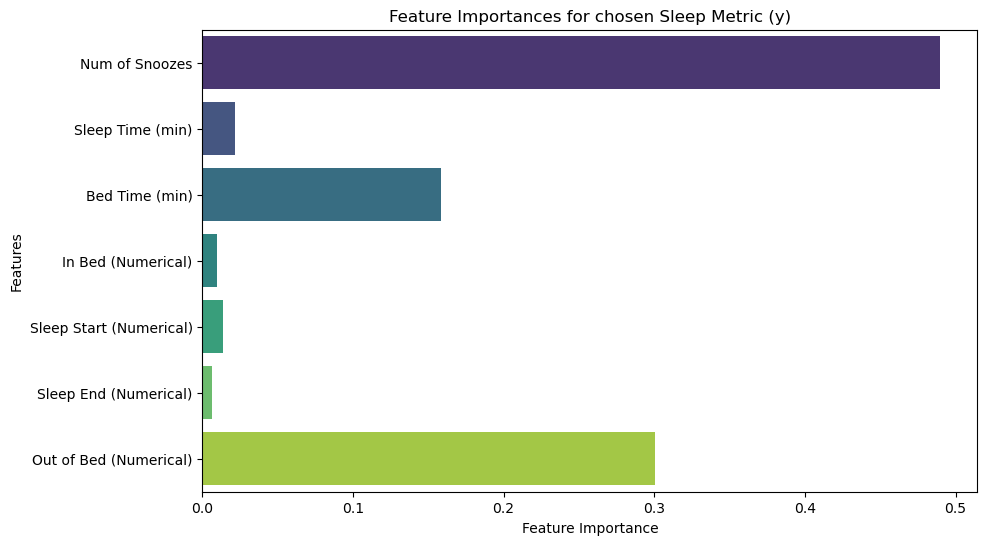

In [10]:
#This sets the Sleep Metric as "In bed for too long?"
X = sleepDF.drop(["Bed for too long? (1/0)", "Sleep Quality (1-10)", "Rating (1-10)", "In Bed", "Sleep Start", "Sleep End", "Out of Bed"], axis = 1)
y = sleepDF["Bed for too long? (1/0)"]
showFeatureImp(X, y)

## Now that we know feature importances, lets look at some key correlations

Correlation between Snoozes and Rating: -0.7630600811287039


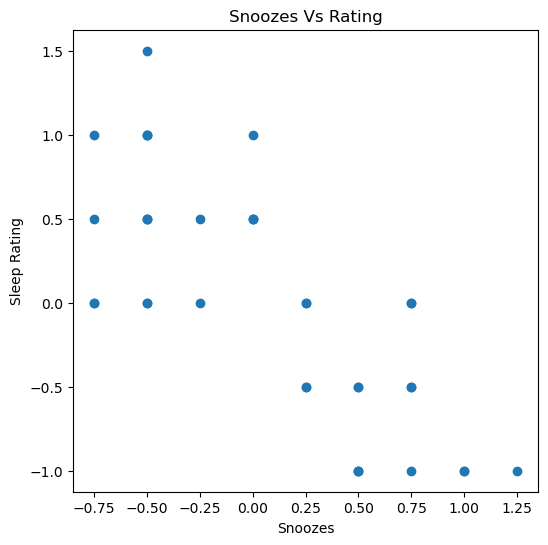

In [11]:
plt.figure(figsize = (6, 6))
plt.subplot(1, 1, 1)
plt.scatter(sleepDF["Num of Snoozes"], sleepDF["Rating (1-10)"])
plt.xlabel('Snoozes')
plt.ylabel('Sleep Rating')
plt.title('Snoozes Vs Rating')

# Compute correlation between snoozes and rating
correlation = sleepDF['Num of Snoozes'].corr(sleepDF['Rating (1-10)'])

print(f"Correlation between Snoozes and Rating: {correlation}")

Correlation between Quality and Rating: 0.5979316774929988


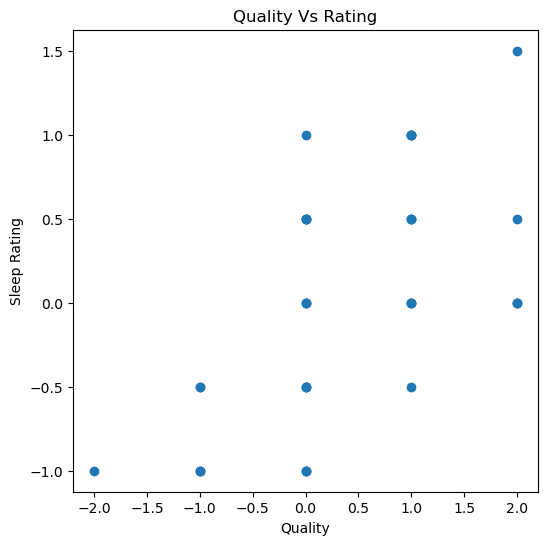

In [12]:
plt.figure(figsize = (6, 6))
plt.subplot(1, 1, 1)
plt.scatter(sleepDF["Sleep Quality (1-10)"], sleepDF["Rating (1-10)"])
plt.xlabel('Quality')
plt.ylabel('Sleep Rating')
plt.title('Quality Vs Rating')

# Compute correlation between quality and rating
correlation = sleepDF['Sleep Quality (1-10)'].corr(sleepDF['Rating (1-10)'])

print(f"Correlation between Quality and Rating: {correlation}")

# Conclusion: 
## The most important factor in my sleep experience is how many times I hit snooze! Keeping a good schedule seems to be somewhat important (going to bed and waking up around the same time, getting enough sleep), but not nearly as important as how many times I hit snooze. The less I hit snooze, the better my sleep experience. I would've never guessed that the number of times I hit snooze would have such a clear impact on my sleep. Even when compared to other factors, such as the amount of sleep I am getting or when I go to bed, it is clearly the most significant factor. Note to self, stay away from the snooze button!